# Linear Regression

Linear regression is linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables)

## Simple Linear Regression :
It Predicts a continious target (y) from one feature (x) using the line y=b0+b1*x, where b0= intercept and b1 is the slope. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 


penguins=pd.read_csv("..\Datasets\penguins.csv")
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [2]:
penguins.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


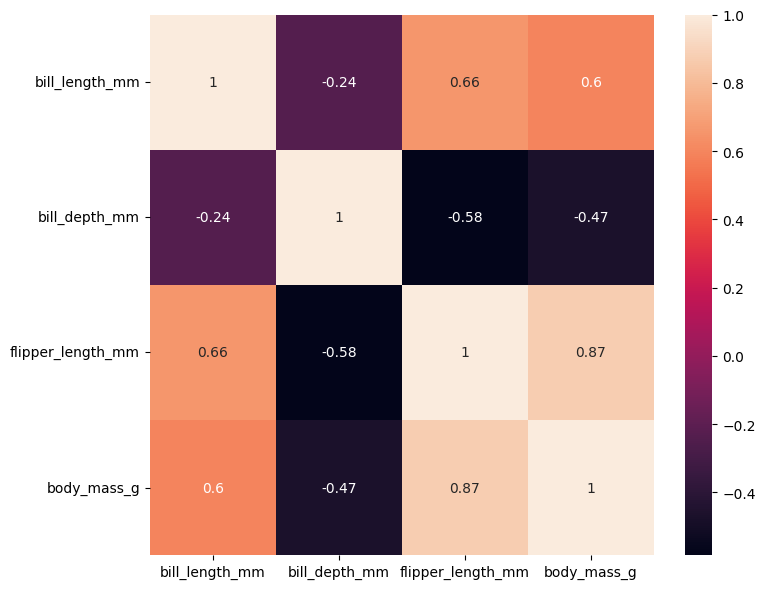

In [4]:
import matplotlib.pyplot as plt
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
data = penguins[num_cols].dropna()
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.tight_layout()
plt.show()

In [5]:
# Prepare data for ML (X,y)
# Feature (X) and Target (y) - Best pair from heatmap

X= data[["flipper_length_mm"]].values
y=data[["body_mass_g"]].values
X.shape

(342, 1)

In [13]:
# Test/Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape
X_test.shape

(69, 1)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

intercept=model.intercept_
Slope=model.coef_[0]    

intercept

array([-5816.87395312])

In [17]:
# Predict and Evaluate
from sklearn.metrics import r2_score, mean_squared_error
y_train_pred=model.predict(X_train)

y_test_pred=model.predict(X_test)

#Metrics that must have
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {train_r2:.3f} | Test R²: {test_r2:.3f}")
print(f"Train RMSE: {train_rmse:.0f}g | Test RMSE: {test_rmse:.0f}g")

Train R²: 0.755 | Test R²: 0.775
Train RMSE: 402g | Test RMSE: 356g


In [24]:
# PREDICT NEW PENGUIN! Predict and Evaluate
 
import numpy as np
new_flipper = np.array([[190]])  # New penguin flipper length
predicted_mass = model.predict(new_flipper)[0].item()

print(f" New penguin (flipper={new_flipper[0][0]}mm)")
print(f" Predicted body mass: {predicted_mass:.0f} grams")

 New penguin (flipper=190mm)
 Predicted body mass: 3655 grams
